# Graded Project
>   Web Development using Flask

> ### Domain:
- Finance and Banking.

> ### Context:
* Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan. <br>
* `Company wants to automate the loan eligibility process based on customer`
detail provided while filling the details online.
They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
 others for checking the eligibility for the home loan. 

> ### Project Objective:
1) This is a standard supervised classification task. A classification problem
where we have to predict whether a customer is eligible for loan or not based on
a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by
entering the username and password and login to the website and then enter
their details to check whether they are eligible for loan or not.

>### Dataset Description:
Dataset can be found [here](https://www.kaggle.com/datasets/ssiddharth408/loan-prediction-dataset)
|SL. No |Attribute              |Description                  |
|-------|-----------------------|-----------------------------|
|1.     | Loan ID               | Unique Loan ID              |
|2.     | Gender                | Male or Female              |
|3.     | Married               | Applicant married (Y/N)     |
|4.     |Dependents             | Number of Dependents        |
|5.     |Self employed          | Self employed (Y/N)         |
|6.     |Education              | Graduate/Undergraduate      |
|7.     |Applicant Income       |Applicant income (in dollars)|
|8.     |Co ApplicantIncome     |Co ApplicantIncome(inDollars)|
|9.     |Loan Amount            |LoanAmountinThousands(Dollar)|
|10.    |Loan Amount Term       |Term of loan in months       |
|11.    | Credit history        |Credit historyMeetsGidelines |
|12.|Property area |Urban/Semi Urban/Rural|
|13. |Loan Status (Target)| Loan Approved (Y/N)Steps|

 ### _Steps to the project_: [Total score: **15** points]
* ####  Model Building and saving the model using Pickle
   1. Import required libraries and read the dataset. (2)
   2. Check the first few samples, shape, info of the data and try to familiarize
        yourself with different features. (2)
    3. Check for missing values in the dataset, if present? handle them with
    appropriate methods and drop redundant features. (2)
    4. Visualize the distribution of the target column 'loan_status' with respect to
    various categorical features and write your observations. (2)
    5. Encode the categorical data. (2)
    6. Separate the target and independent features and split the data into train
    and test. (2)
    7. Build any classification model to predict the loan status of the customer
    and save your model using pickle. (3)


In [3]:
#Import required libraries  

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
#Read the dataset
loan_data = pd.read_csv(r'loan_approval_data.csv')
loan_data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [5]:
#Info of the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
#Shape of the dataset
loan_data.shape

(614, 13)

In [7]:
#Object type columns in the dataset.
print("___________________________________________________")
print("|________Columns which are of Object type_________|")
print("Columns :{}".format(loan_data.select_dtypes('object').columns))
print("----------------------------------------------")
print("Total number of object columns:{} ".format(loan_data.select_dtypes('object').columns.value_counts().sum()))
#Numerical columns in the dataset
print("____________________________________________________")
print("|_______Columns which are of Numerical type________|")
print("Numerical columns {}".format(loan_data.select_dtypes(exclude='object').columns.values))
print("----------------------------------------------")
print("Numerical columns count: {}".format(loan_data.select_dtypes(exclude='object').columns.value_counts().sum()))

___________________________________________________
|________Columns which are of Object type_________|
Columns :Index(['loan_id', 'gender', 'married', 'education', 'self_employed',
       'property_area', 'loan_status'],
      dtype='object')
----------------------------------------------
Total number of object columns:7 
____________________________________________________
|_______Columns which are of Numerical type________|
Numerical columns ['dependents' 'applicantincome' 'coapplicantincome' 'loanamount'
 'loan_amount_term' 'credit_history']
----------------------------------------------
Numerical columns count: 6


In [8]:
print("The statistical values of the dataset(numerical)")
loan_data.describe().T

The statistical values of the dataset(numerical)


,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
#Check for missing values in the dataset.
total_val = loan_data.size
Nan_minus = loan_data.count().sum()
missing_val = total_val - Nan_minus
print("Total number of missing values: {}".format(missing_val))

Total number of missing values: 149


In [10]:
#Missing values in each feature
#Calculate the percentage of null values in DataFrame
(loan_data.isnull().sum()*100)/len(loan_data)

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [11]:
# ---Handling missing values in the dataset---
# Handling credit history feature:
loan_data['credit_history']= loan_data['credit_history'].fillna(loan_data['credit_history'].median())
# Handling Loanamount feature:
loan_data['loanamount'] = loan_data['loanamount'].fillna(loan_data['loanamount'].median())
# Handling loan_amount_term feature:
loan_data['loan_amount_term']=loan_data['loan_amount_term'].fillna(loan_data['loan_amount_term'].median())
# Handling self_employed feature:
loan_data['self_employed'] = loan_data['self_employed'].fillna(loan_data['self_employed'].mode()[0]) #categorical so Mode
# Handling dependents feature :
loan_data['dependents']=loan_data['dependents'].fillna(loan_data['dependents'].median())
# Handling gender feature :
loan_data['gender']=loan_data['gender'].fillna(loan_data['gender'].mode()[0])
# Handling married feature :
loan_data['married']=loan_data['married'].fillna(loan_data['married'].mode()[0])

In [12]:
# All the missing values have been handled.
(loan_data.isnull().sum()*100)/len(loan_data)

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [13]:
# Drop Redundant columns.
loan_data.drop(columns='loan_id',inplace=True,axis=1)

In [14]:
#Visualize the distribution of the target column 'loan_status' with respect to 
#various categorical features and write your observations.
cat_feature = loan_data.select_dtypes(include='O').columns
cat_feature

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

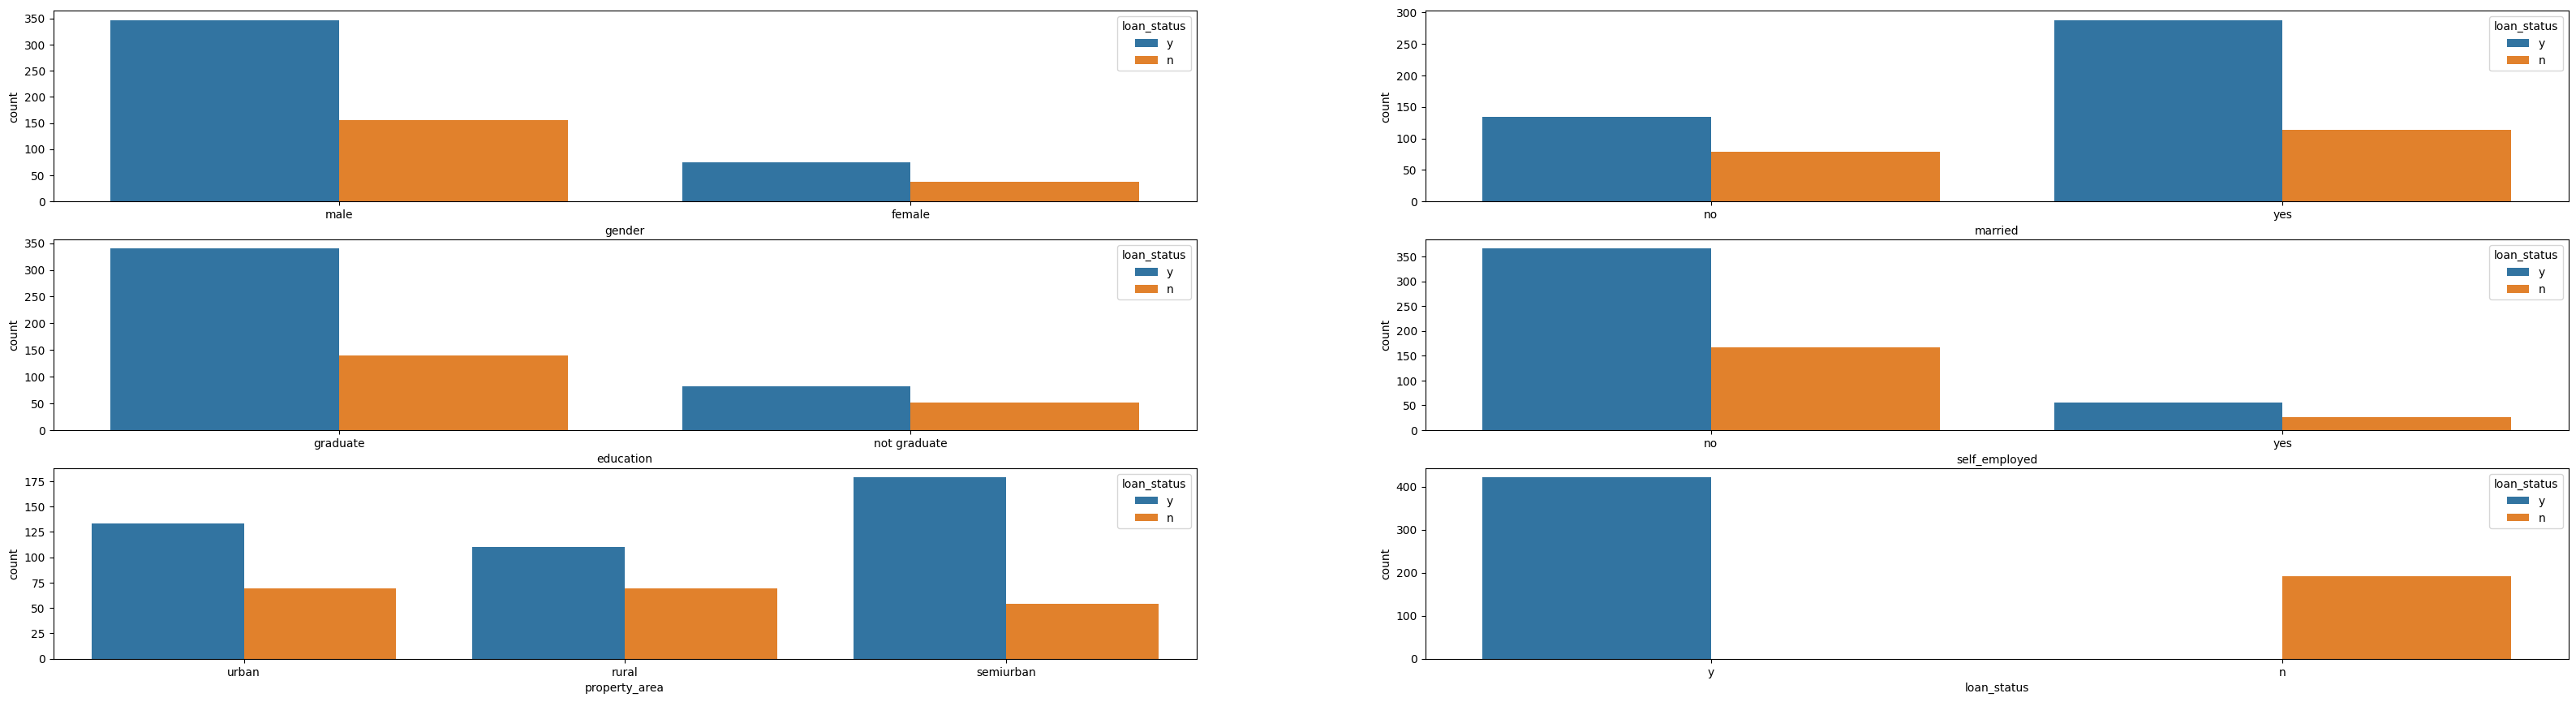

In [15]:
#Visualize the distribution of the target column 'loan_status' with respect to various categorical columns
plt.figure(figsize=(40,25))
i=1
for feature in cat_feature:
    plt.subplot(7,2,i)
    sb.countplot(x=feature,hue='loan_status',data=loan_data)
    i+=1

- Loan approval in case of Gender :` Male have more loan approvals`
- Loan approval in case of Married : `Married are given more loan approvals`
- Loan approval in case of Education : `Graduates are given more loan approvals`
- In case of Self-Employeed : `Employeed have larger loan approvals`
- In case of Property Area : `Semi-Urban have more loan approvals`

In [16]:
clean_data = loan_data.copy()

5. Encode the categorical data. (2)
 


In [17]:
#Encode the categorical data.
le=LabelEncoder()
for c in cat_feature:
    clean_data[c] = clean_data[[c]].apply(le.fit_transform)

In [18]:
#Standardize and scale the columns
std=StandardScaler()
scaled_feature = std.fit_transform(clean_data.values)
scaled_feature_df = pd.DataFrame(scaled_feature,columns=clean_data.columns,index=clean_data.index)

In [19]:
scaled_feature_df.head(3)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.211241,0.273231,0.411733,-1.318513,-1.482537
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1.223298,0.674519


In [20]:
#5.Separate the target and independent features and split the data into train and test.
X = clean_data.drop(columns='loan_status')
Y = clean_data['loan_status']

In [21]:
#split the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=30)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(584, 11) (30, 11)
(584,) (30,)


In [22]:
#Function to predict the model
def pred_model(model,X_test,X_train,Y_test,Y_train):
    model.fit(X_train,Y_train)
    predct = model.predict(X_test)
    accuracy = accuracy_score(Y_test,predct)
    return accuracy

In [23]:
# Model intialization 
lgr=LogisticRegression()
knn=KNeighborsClassifier()
nb=GaussianNB()
dst=DecisionTreeClassifier()
rdf=RandomForestClassifier()
adb=AdaBoostClassifier()
gb=GradientBoostingClassifier()

estimator =[('rdf',rdf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators=estimator,final_estimator=rdf)

In [24]:
result = pd.DataFrame(columns=['accuracy'])
for model,model_name in zip([lgr,knn,nb,dst,rdf,adb,gb,sc],
                            ['Logistic regression','KNN','Naive Bayes','Decision tree','Random Forest', 
                             'Adaboost','GradientBoost','Stacking']):
    result.loc[model_name] = pred_model(model,X_test,X_train,Y_test,Y_train)

result

,accuracy
Logistic regression,0.833333
KNN,0.533333
Naive Bayes,0.833333
Decision tree,0.800000
Random Forest,0.766667
Adaboost,0.833333
GradientBoost,0.800000
Stacking,0.833333


Since Loan Approval seek to obtain a binary output plus from above observation we can find Logistic regression to be having greater accuracy. The model will choose logistic regression.

In [62]:
lgr.fit(X_train,Y_train)
y_pred=lgr.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

# Generate classification report
cr = classification_report(Y_test, y_pred)
print(cr)

[[ 6  5]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.79      1.00      0.88        19

    accuracy                           0.83        30
   macro avg       0.90      0.77      0.79        30
weighted avg       0.87      0.83      0.82        30



From above classification report we can conclude that
- Precission for Loan approval is `100%` accurate and non-approval is `79% accurate`.
- Recall ensures how well the model predict accuracy: here loan approval `100%` correctly identified.
- The model has an accuracy of 0.83, which means that it has correctly predicted 83% of the samples. - The F1 score for `Loan_approval is 71%, and for Non_approval is 88%`. 
- The model has higher F1 score for Loan_non-approval , which means that it is better at predicting Loan_non-approval . 
-The support for class 0 is 11, and for class 1, it is 19

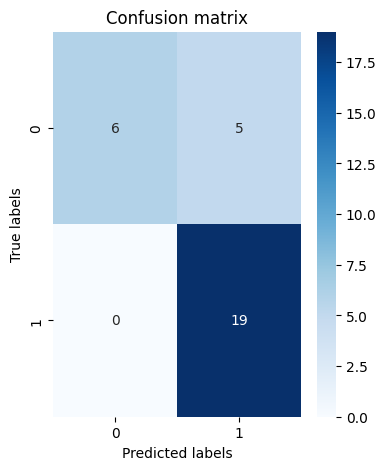

In [65]:
plt.figure(figsize=(4,5))
# Plot confusion matrix as heatmap
sb.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion matrix")
plt.show()

In [68]:
#Pickle import and save model
import pickle
#save model
pickle.dump(lgr,open('model.pkl','wb'))

>* ### Python Flask Application development (35 points)